In [2]:
import matplotlib.pyplot as plt
import os
import re
import json
import numpy as np
%matplotlib inline

### Calculate maximum LaTeX formula length from an input file

In [13]:
def max_length(file_path, encoding="utf-8"):
    lens = []
    with open(file_path, "r", encoding=encoding) as file:
        for line in file:
            lens.append(len(line))
    return lens, max(lens)

In [20]:
def plot_len_dist(file_path, *args, encoding="utf-8", **kwargs):
    lens, max_len = max_length(file_path, encoding)
    plt.hist(lens, **kwargs)
    print("File: {}, max_len: {}".format(file_path, max_len))

File: data/formulas_processed.lst, max_len: 2178


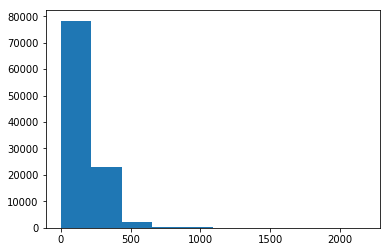

In [21]:
plot_len_dist("data/formulas_processed.lst")

File: data/formulas.lst, max_len: 998


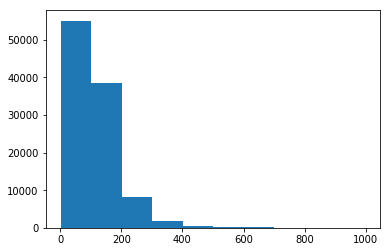

In [23]:
plot_len_dist("data/formulas.lst", encoding="ISO-8859-15")

### Encode-Decode

In [4]:
def to_utf(src_path, dest_path, encoding):
    with open(src_path, "r", encoding=encoding) as fin:
        with open(dest_path, "w", encoding="utf-8") as fout:
            for line in fin:
                fout.write(line)
    print("Done.")

In [27]:
to_utf("data/formulas.lst", "data/formulas_utf.lst", encoding="ISO-8859-15")

Done.


## Process/crawl `LaTeX` / `TeX`

In [2]:
regex = re.compile(r"\\(begin\{equation\} )(\\(?:begin|label)\{(?:.*?)\} )* (.*?) \\end\{equation(:?.*?)\}+")
regex_2 = re.compile(r"\\(?:begin\{equation\})(.*?)\\end\{equation\}", re.S)

In [10]:
with open("data/test/test.tex", "r") as file:
    data = file.read().replace("\n", " ")

In [11]:
a = regex.findall(data)
b = regex_2.findall(data)

In [12]:
for i in a[:20]:
    print(i)
print("=========================================")
for i in b[:20]:
    print(i)


('begin{equation} ', '\\begin{split} \\tilde{\\mathcal{L}}^{(t)} ', '        &=\\sum^n_{i=1} [g_i f_t(\\x_i)+\\frac{1}{2}h_if_t^2(\\x_i)]+\\gamma T + \\frac{1}{2}\\lambda\\sum^T_{j=1}w_j^2\\\\          &=\\sum^T_{j=1}[(\\sum_{i\\in I_j} g_i)w_j+\\frac{1}{2}(\\sum_{i\\in I_j} h_i+\\lambda)w_j^2]+\\gamma T \\end{split}', '')
('begin{equation} ', '', '   r_{k}(z) =\\frac{1}{\\sum_{(x, h)\\in \\sD_k} h} \\sum_{(x, h)\\in \\sD_k, x < z} h,', '')
('begin{equation} ', '', '   |r_{k}(s_{k,j})  - r_{k}(s_{k,j+1})| < \\eps, \\ \\ s_{k1} = \\min_i \\x_{ik},  s_{kl} = \\max_i \\x_{ik}.', '')
('begin{equation} ', '', '   r^-_{\\sD}(y) = \\sum_{(x,w)\\in \\sD, x < y} w', '')
('begin{equation} ', '', '   r^+_{\\sD}(y) = \\sum_{(x,w)\\in \\sD, x \\leq y} w', '')
('begin{equation} ', '', '   \\w_{\\sD}(y) =  r^+_{\\sD}(y)  - r^-_{\\sD}(y) =  \\sum_{(x,w)\\in \\sD, x = y} w .', '')
('begin{equation} ', '', '   \\w(\\sD) = \\sum_{(x,w)\\in \\sD} w', '')
('begin{equation} ', '', '\\tdr^-(x_i) + \\tdw(x_i)

In [6]:
print(data)

% This is "sig-alternate.tex" V2.1 April 2013 % This file should be compiled with V2.5 of "sig-alternate.cls" May 2012 % % This example file demonstrates the use of the 'sig-alternate.cls' % V2.5 LaTeX2e document class file. It is for those submitting % articles to ACM Conference Proceedings WHO DO NOT WISH TO % STRICTLY ADHERE TO THE SIGS (PUBS-BOARD-ENDORSED) STYLE. % The 'sig-alternate.cls' file will produce a similar-looking, % albeit, 'tighter' paper resulting in, invariably, fewer pages. % % ---------------------------------------------------------------------------------------------------------------- % This .tex file (and associated .cls V2.5) produces: % 1) The Permission Statement % 2) The Conference (location) Info information % 3) The Copyright Line with ACM data % 4) NO page numbers % % as against the acm_proc_article-sp.cls file which % DOES NOT produce 1) thru' 3) above. % % Using 'sig-alternate.cls' you have control, however, from within % the source .tex file, over bot

In [141]:
tex = "cat dog cat dog cat dog cat dog"
re.findall("(ca(.*?)og)", tex)

[('cat dog', 't d'),
 ('cat dog', 't d'),
 ('cat dog', 't d'),
 ('cat dog', 't d')]

## Process json

In [3]:
with open("data/checkpoints/20190709_0221/checkpoints/checkpoint_292050.json", "r") as j:
    data = json.load(j)
    print(data.keys())

dict_keys(['i', 'val_loss_history', 'val_loss_history_it', 'forward_backward_times', 'opt', 'train_loss_history', 'memory_usage'])


In [4]:
len(data["train_loss_history"])

292050

In [5]:
data["opt"]

{'max_epochs': 50,
 'checkpoint_every': 1000,
 'batch_size': 50,
 'memory_benchmark': 0,
 'init_from': '',
 'grad_clip': 5,
 'model_type': 'lstm',
 'lr_decay_every': 5,
 'print_every': 1,
 'wordvec_size': 64,
 'seq_length': 50,
 'input_json': 'data/tiny-shakespeare.json',
 'num_layers': 2,
 'input_h5': 'data/formulas_processed.h5',
 'reset_iterations': 1,
 'rnn_size': 128,
 'dropout': 0,
 'checkpoint_name': 'cv/checkpoint',
 'batchnorm': 0,
 'learning_rate': 0.002,
 'speed_benchmark': 0,
 'gpu_backend': 'cuda',
 'lr_decay_factor': 0.5,
 'gpu': 0}

In [ ]:
step = data["opt"]["checkpoint_every"]
np.arange(start=step, stop=step * len(data["val_loss_history"]) + 1, step=step)

In [37]:
plt.subplot(241)
plt.plot([1, 2, 3], [1, 2, 3])
plt.subplot()

True

In [44]:
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

(0.0, 3)

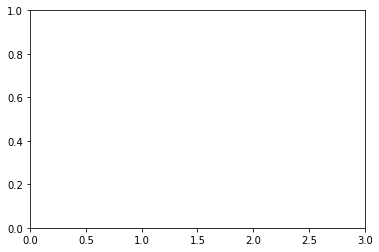

In [47]:
plt.xlim(left=None, right=3)

In [11]:
a = np.arange(12).reshape((2, 2, -1))
a

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [12]:
a[1, -1]

array([ 9, 10, 11])

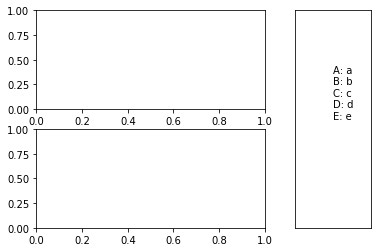

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=2, gridspec_kw={'width_ratios': [3, 1]})
gs = axs[1, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, -1])
axbig.get_xaxis().set_visible(False)
axbig.get_yaxis().set_visible(False)

axbig.text(0.5, 0.5, '''A: a
B: b
C: c
D: d
E: e''')
plt.show()

In [28]:
"%s"%"a"

'a'